In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import gc

In [ ]:
folder_path = '/content/drive/MyDrive/data/csv'
csv_files = [f for f in os.listdir(folder_path)]

app_map = pd.read_csv('/content/drive/MyDrive/data/app2appclass.csv')

In [ ]:
# Initialize an empty list to store dataframes
dataframes = []

# Loop through the CSV files and read each one
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, parse_dates=['f0_'])
    merged_df = pd.merge(df, app_map, on='application', how='left')
    dataframes.append(merged_df)
    print(f'Read {file}.')

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.rename(columns={'f0_': 'date'}, inplace=True)

del df, dataframes, merged_df
gc.collect()

Read part000000000000.
Read part000000000001.
Read part000000000002.
Read part000000000003.
Read part000000000004.
Read part000000000005.
Read part000000000006.
Read part000000000007.
Read part000000000008.
Read part000000000009.


0

In [ ]:
combined_df.head()

,date,userid,application,download_tx_cnt,upload_tx_cnt,appclass
0,2020-11-19,62608909,dMD9oQVLBL8+I2XUZ+MqR+P+uns=,13,13,Consumer Apps
1,2020-11-19,65467790,6r35ThOZb1ehJNIvjVsf2lAVYwc=,126,232,Webmail
2,2020-11-19,4745414,HcXcho3eLxJ6xmIwKLIrMuOlOmk=,68,46,Human Resources
3,2020-11-19,5148061,pFp5lJc6I0+ujkdZElsnf5ODhIE=,1,4,Social Networking
4,2020-11-19,5186964,GRqT1CrQmge9awNJTy8pJKVjQLw=,129,130,Enterprise


In [ ]:
combined_df.shape

(85956222, 6)

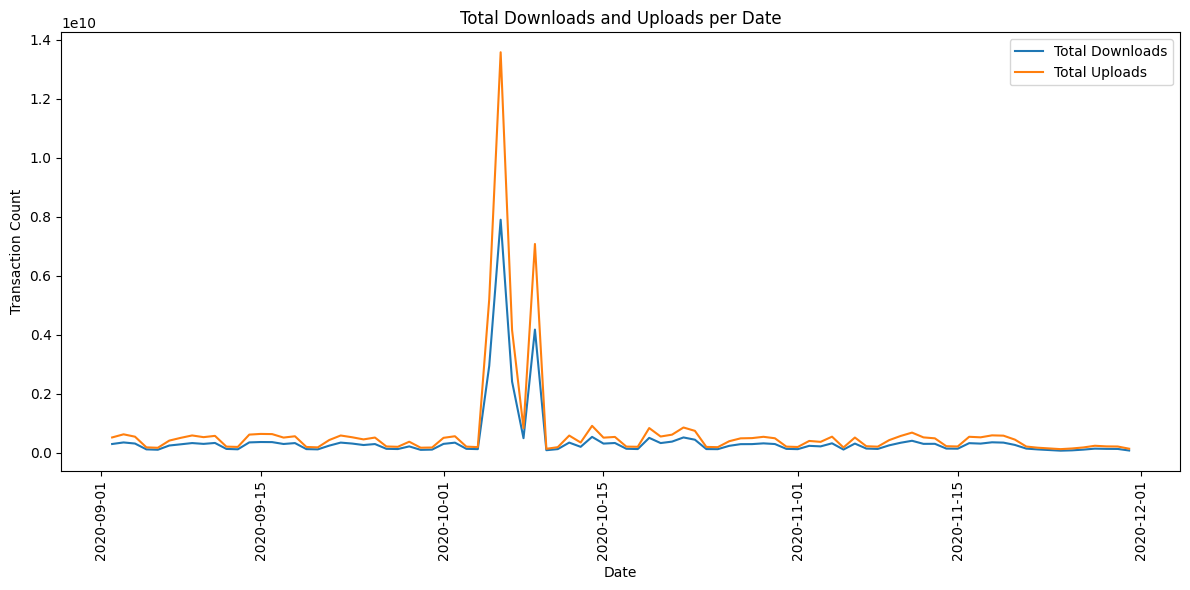

In [ ]:
# Group by 'date' and sum 'download_tx_cnt' and 'upload_tx_cnt'
aggregated_data = combined_df.groupby('date').agg({'download_tx_cnt': 'sum', 'upload_tx_cnt': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['date'], aggregated_data['download_tx_cnt'], label='Total Downloads')
plt.plot(aggregated_data['date'], aggregated_data['upload_tx_cnt'], label='Total Uploads')

plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Total Downloads and Uploads per Date')
plt.legend()
plt.xticks(rotation=90)  # Rotate date labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


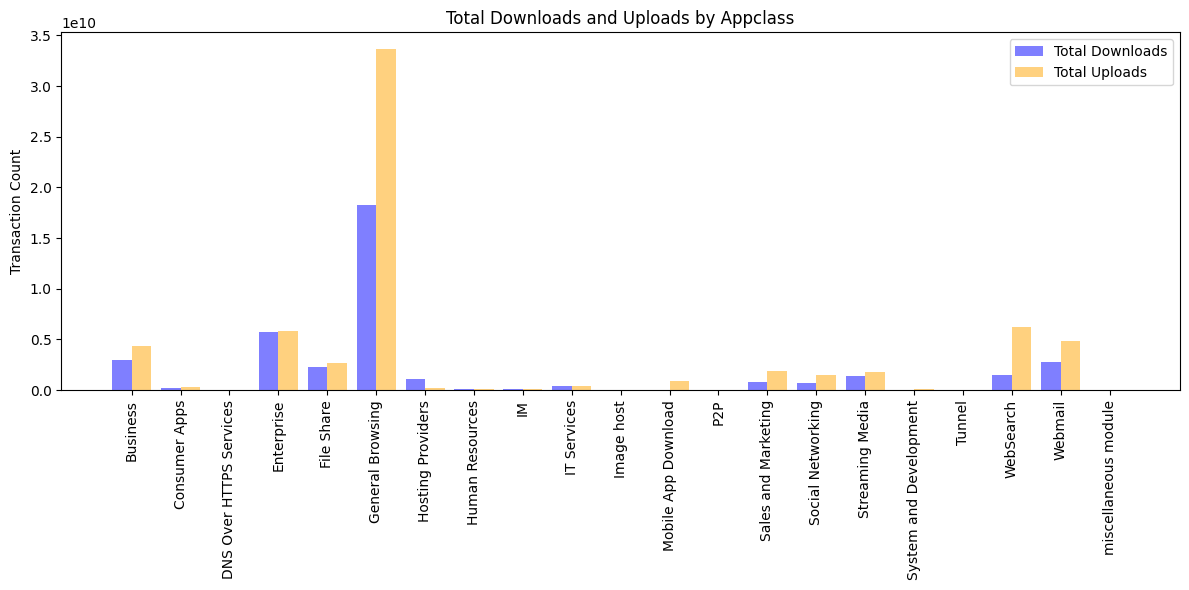

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'appclass' and sum 'download_tx_cnt' and 'upload_tx_cnt'
aggregated_data = combined_df.groupby('appclass').agg({'download_tx_cnt': 'sum', 'upload_tx_cnt': 'sum'}).reset_index()

# Setting the positions and width for the bars
pos = list(range(len(aggregated_data['appclass'])))
width = 0.4  # the width of a bar

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Creating bars for total downloads
plt.bar([p - width/2 for p in pos],
        aggregated_data['download_tx_cnt'],
        width,
        alpha=0.5,
        color='blue',
        label='Total Downloads')

# Creating bars for total uploads
plt.bar([p + width/2 for p in pos],
        aggregated_data['upload_tx_cnt'],
        width,
        alpha=0.5,
        color='orange',
        label='Total Uploads')

# Adding labels and titles
ax.set_ylabel('Transaction Count')
ax.set_title('Total Downloads and Uploads by Appclass')
ax.set_xticks(pos)
ax.set_xticklabels(aggregated_data['appclass'])
plt.xticks(rotation=90)

plt.legend()

plt.tight_layout()
plt.show()


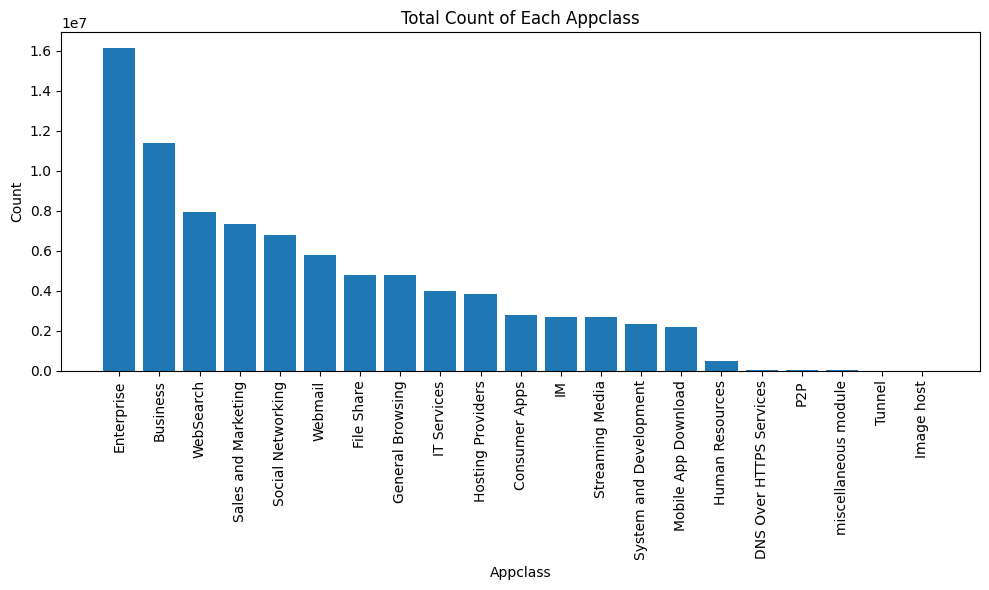

In [ ]:
appclass_counts = combined_df['appclass'].value_counts().reset_index()
appclass_counts.columns = ['appclass', 'count']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(appclass_counts['appclass'], appclass_counts['count'])

plt.xlabel('Appclass')
plt.ylabel('Count')
plt.title('Total Count of Each Appclass')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


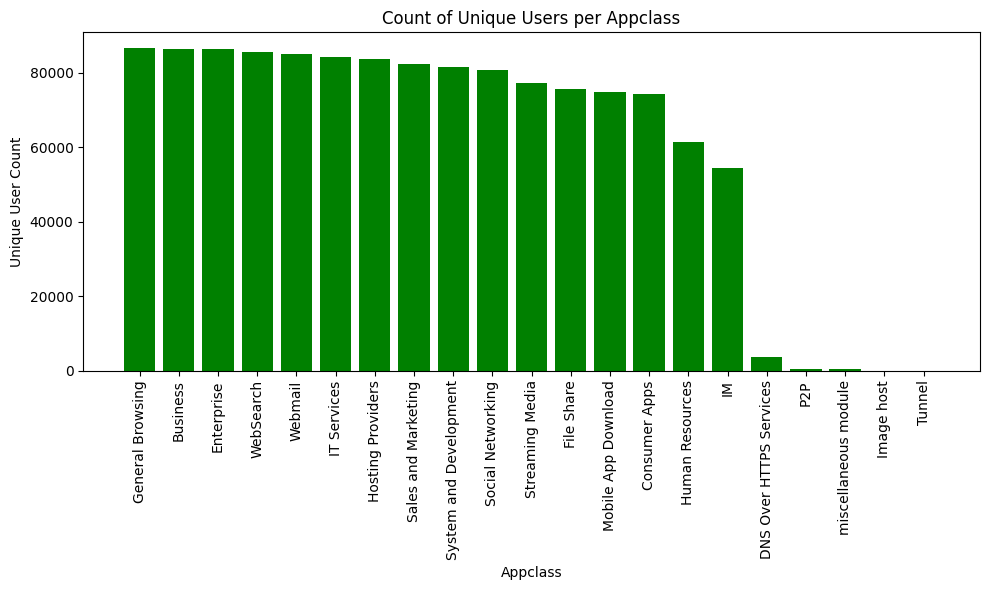

In [ ]:
user_count_per_appclass = combined_df.groupby('appclass')['userid'].nunique().reset_index()
user_count_per_appclass.columns = ['appclass', 'user_count']

# Sorting the DataFrame by user count for better visualization
user_count_per_appclass = user_count_per_appclass.sort_values(by='user_count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(user_count_per_appclass['appclass'], user_count_per_appclass['user_count'], color='green')

plt.xlabel('Appclass')
plt.ylabel('Unique User Count')
plt.title('Count of Unique Users per Appclass')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

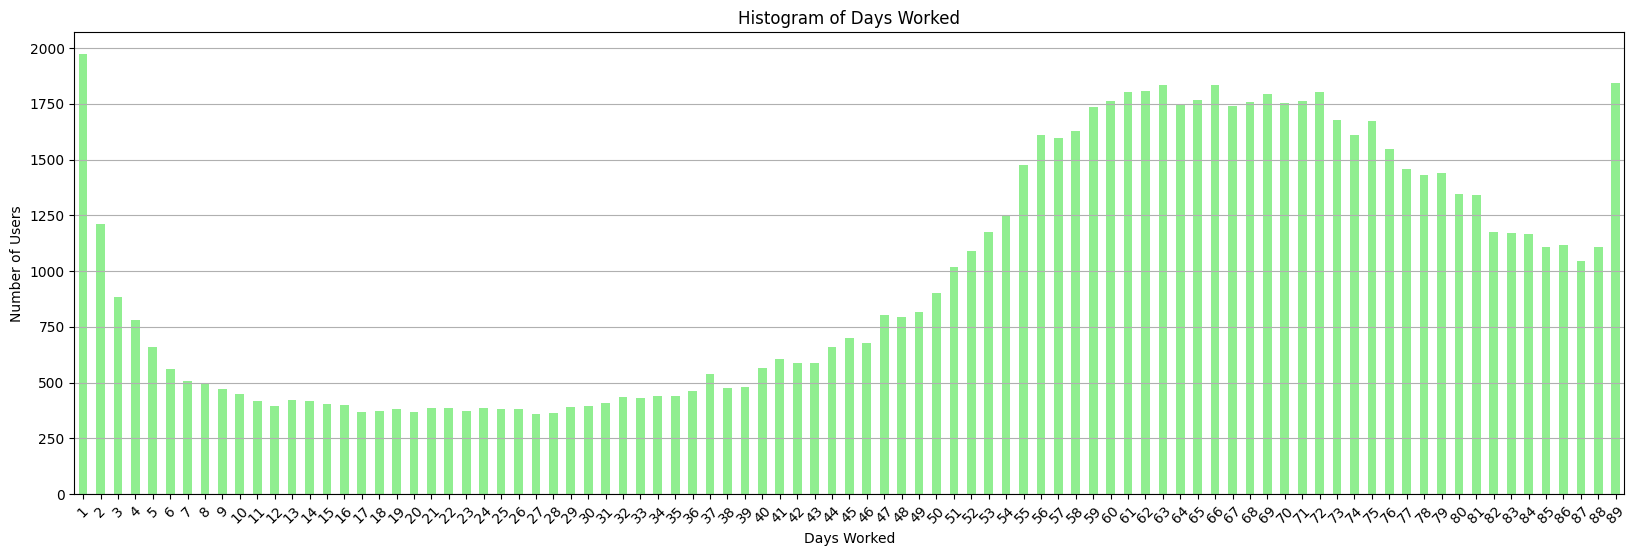

In [ ]:
df_unique = combined_df.drop_duplicates(subset=['date', 'userid'])
user_work_days = df_unique.groupby('userid')['date'].nunique()

days_worked_counts = user_work_days.value_counts().sort_index()

# Plotting a histogram
plt.figure(figsize=(20, 6))
days_worked_counts.plot(kind='bar', color='lightgreen')
plt.title('Histogram of Days Worked')
plt.xlabel('Days Worked')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
user_active_days = combined_df.groupby('userid')['date'].nunique().reset_index()
user_active_days = user_active_days.rename(columns={'date': 'active_days'})

# Filter users who have been active between 43 and 73 days
eligible_users = user_active_days[(user_active_days['active_days'] >= 43) & (user_active_days['active_days'] <= 73)]
# eligible_users = user_active_days[(user_active_days['active_days']==89)]

# Merge with the original dataframe to get only the eligible users' data
eligible_data = pd.merge(combined_df, eligible_users, on='userid')

In [ ]:
features_df = eligible_data.groupby(['appclass', 'userid']).agg(
    appclass_count=('appclass', 'count'),
    total_download=('download_tx_cnt', 'sum'),
    total_upload=('upload_tx_cnt', 'sum')
).reset_index()

In [ ]:
features_df

,appclass,userid,appclass_count,total_download,total_upload
0,Business,1847,168,39054,53538
1,Business,1992,130,55717,73987
2,Business,3288,97,46364,67154
3,Business,4034,100,33475,22870
4,Business,5571,147,25061,42352
...,...,...,...,...,...
662273,miscellaneous module,58321982,9,446,16
662274,miscellaneous module,58322163,18,200,5
662275,miscellaneous module,58322164,18,378,0
662276,miscellaneous module,58388281,1,1,0


In [ ]:
features_df["transaction_ratio"] =  features_df["total_download"] / features_df["total_upload"]
features_df["total_transaction"] = features_df["total_download"] + features_df["total_upload"]

features_df["app_usage"] = features_df["total_transaction"] / (features_df["appclass_count"])
features_df["data_usage_efficiency"] = features_df["total_transaction"] / (features_df["appclass_count"])**2

In [ ]:
features_df.sort_values(by=['userid', 'appclass']).iloc[0:20]

,appclass,userid,appclass_count,total_download,total_upload,transaction_ratio,total_transaction,app_usage,data_usage_efficiency
0,Business,1847,168,39054,53538,0.729463,92592,551.142857,3.280612
43363,Consumer Apps,1847,29,4238,4457,0.950864,8695,299.827586,10.338882
86099,Enterprise,1847,164,2723,2698,1.009266,5421,33.054878,0.201554
129462,File Share,1847,28,100,110,0.909091,210,7.500000,0.267857
171120,General Browsing,1847,66,185181,353115,0.524421,538296,8156.000000,123.575758
214493,Hosting Providers,1847,64,2849,2851,0.999298,5700,89.062500,1.391602
257337,Human Resources,1847,9,825,567,1.455026,1392,154.666667,17.185185
320273,IT Services,1847,46,4073,4298,0.947650,8371,181.978261,3.956049
363644,Mobile App Download,1847,6,1106,2511,0.440462,3617,602.833333,100.472222
404931,Sales and Marketing,1847,69,5483,8599,0.637632,14082,204.086957,2.957782


In [ ]:
features_df_pivot = features_df.pivot(index='userid', columns='appclass', values='transaction_ratio').fillna(0)

In [ ]:
features_df_pivot.head()

appclass,Business,Consumer Apps,DNS Over HTTPS Services,Enterprise,File Share,General Browsing,Hosting Providers,Human Resources,IM,IT Services,...,Mobile App Download,P2P,Sales and Marketing,Social Networking,Streaming Media,System and Development,Tunnel,WebSearch,Webmail,miscellaneous module
userid,,,,,,,,,,,,,,,,,,,,,
1847,0.729463,0.950864,0.0,1.009266,0.909091,0.524421,0.999298,1.455026,0.000000,0.947650,...,0.440462,0.0,0.637632,0.356976,1.087719,0.728937,0.0,1.370143,0.618911,0.0
1992,0.753065,0.849453,0.0,0.727144,0.616114,0.546360,0.977598,1.504425,1.005922,0.989836,...,0.295213,0.0,1.057467,0.347804,2.130972,0.082969,0.0,0.261310,0.447741,0.0
3288,0.690413,0.639344,0.0,0.864648,0.733725,0.728650,1.000000,0.000000,0.000000,0.996316,...,0.130435,0.0,0.546400,0.812500,1.905660,0.074074,0.0,0.963608,0.548388,0.0
4034,1.463708,1.000000,0.0,4.657105,1.214953,1.534696,1.456274,1.354037,0.000000,2.058983,...,0.086207,0.0,0.973375,1.108992,1.003906,0.679934,0.0,0.355134,1.014519,0.0
5571,0.591731,0.648148,0.0,0.672739,0.841991,0.826634,0.993978,1.651007,0.875000,0.987692,...,0.158796,0.0,0.494476,0.232644,0.873570,0.025203,0.0,0.419250,0.899544,0.0


In [ ]:
features_df_pivot.shape

(43373, 20)

In [ ]:
features_df_pivot.drop('General Browsing', axis=1, inplace=True)


In [ ]:
# Check for NaN values
nan_values = features_df_pivot.isna().sum()
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 appclass
Business                   0
Consumer Apps              0
DNS Over HTTPS Services    0
Enterprise                 0
File Share                 0
Hosting Providers          0
Human Resources            0
IM                         0
IT Services                0
Image host                 0
Mobile App Download        0
P2P                        0
Sales and Marketing        0
Social Networking          0
Streaming Media            0
System and Development     0
Tunnel                     0
WebSearch                  0
Webmail                    0
miscellaneous module       0
dtype: int64


In [ ]:
# Check for infinite values
inf_values = np.isinf(features_df_pivot).sum()
print("Infinite values in each column:\n", inf_values)

Infinite values in each column:
 appclass
Business                    0
Consumer Apps              50
DNS Over HTTPS Services    11
Enterprise                  0
File Share                 15
Hosting Providers          27
Human Resources            19
IM                         73
IT Services                19
Image host                 13
Mobile App Download        30
P2P                         6
Sales and Marketing         7
Social Networking           2
Streaming Media            62
System and Development     16
Tunnel                      4
WebSearch                  60
Webmail                     4
miscellaneous module       32
dtype: int64


In [ ]:
features_df_pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
features_df_pivot = features_df_pivot.fillna(features_df_pivot.mean())  # Example: filling with mean

In [ ]:
pca_data = features_df_pivot.copy(deep=True)
pca_data.drop(pca_data.columns[0], axis=1, inplace=True)

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(pca_data)

Text(0, 0.5, 'cumulative explained variance')

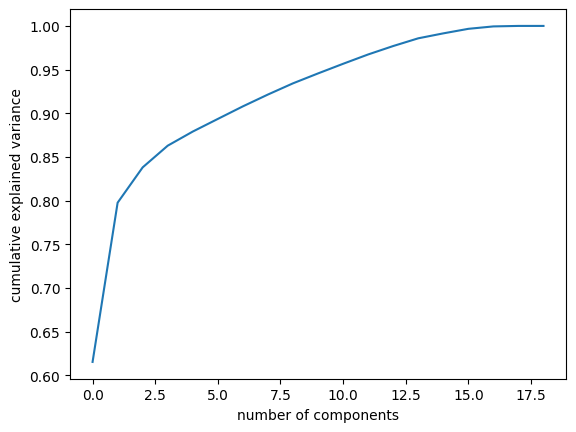

In [ ]:
pca = PCA()
pca.fit(data_rescaled)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Assuming `explained_variance_ratio` is the array of cumulative explained variance ratios
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Finding the number of components for at least 95% cumulative explained variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Adding 1 because index starts from 0
n_components_95

11

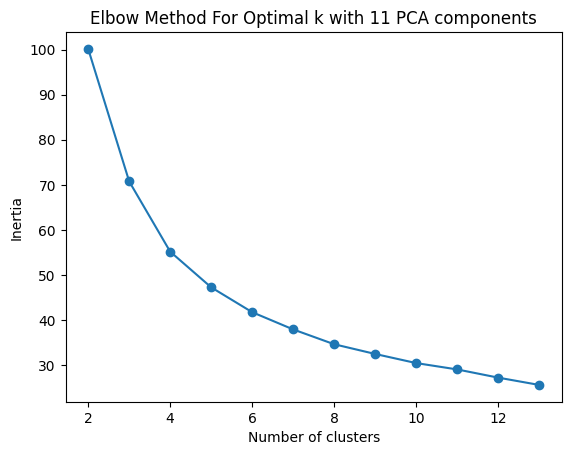

In [ ]:
# Clustering
range_clusters = range(2, 14)
inertia = []

pca = PCA(n_components=n_components_95)
pca_data = pca.fit_transform(data_rescaled)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title(f'Elbow Method For Optimal k with {n_components_95} PCA components')
plt.show()

In [ ]:
pca = PCA(n_components=n_components_95)
pca_data = pca.fit_transform(data_rescaled)

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_
features_df_pivot['cluster_labels'] = cluster_labels

In [ ]:
import plotly.express as px

# Converting data to a DataFrame for ease of use with Plotly
import pandas as pd
df_pca_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
df_pca_data['Cluster'] = cluster_labels

# Creating a 3D scatter plot
fig = px.scatter_3d(df_pca_data, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title="3D Visualization of Clusters using Plotly",
                    labels={'Cluster': 'Cluster Label'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [ ]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)

print(f"The average silhouette score is: {silhouette_avg}")


In [ ]:
features_df_pivot.head()

appclass,Business,Consumer Apps,DNS Over HTTPS Services,Enterprise,File Share,General Browsing,Hosting Providers,Human Resources,IM,IT Services,...,P2P,Sales and Marketing,Social Networking,Streaming Media,System and Development,Tunnel,WebSearch,Webmail,miscellaneous module,cluster_labels
userid,,,,,,,,,,,,,,,,,,,,,
1847,0.729463,0.950864,0.0,1.009266,0.909091,0.524421,0.999298,1.455026,0.000000,0.947650,...,0.0,0.637632,0.356976,1.087719,0.728937,0.0,1.370143,0.618911,0.0,1
1992,0.753065,0.849453,0.0,0.727144,0.616114,0.546360,0.977598,1.504425,1.005922,0.989836,...,0.0,1.057467,0.347804,2.130972,0.082969,0.0,0.261310,0.447741,0.0,1
3288,0.690413,0.639344,0.0,0.864648,0.733725,0.728650,1.000000,0.000000,0.000000,0.996316,...,0.0,0.546400,0.812500,1.905660,0.074074,0.0,0.963608,0.548388,0.0,4
4034,1.463708,1.000000,0.0,4.657105,1.214953,1.534696,1.456274,1.354037,0.000000,2.058983,...,0.0,0.973375,1.108992,1.003906,0.679934,0.0,0.355134,1.014519,0.0,1
5571,0.591731,0.648148,0.0,0.672739,0.841991,0.826634,0.993978,1.651007,0.875000,0.987692,...,0.0,0.494476,0.232644,0.873570,0.025203,0.0,0.419250,0.899544,0.0,1


In [ ]:
features_df_pivot["cluster_labels"].value_counts()

In [ ]:
user_clusters = features_df_pivot[['cluster_labels']].reset_index()
user_clusters.head()

appclass,userid,cluster_labels
0,1847,1
1,1992,1
2,3288,4
3,4034,1
4,5571,1


In [ ]:
user_clusters.to_csv("user_clusters.csv", index=False)